In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels as sm
import pmdarima as pm

In [220]:
df = pd.read_csv("../prices.txt", sep='\s+', header=None, index_col=None)
df.index = np.arange(df.shape[0])
df.rename(columns=lambda c: str(c), inplace=True)

In [221]:
from datetime import datetime, timedelta

train = df.iloc[:300, :]
train.index = index=[datetime(2022, 1, 1, 12, 0, 0) - timedelta(seconds=i) for i in range(train.shape[0])]

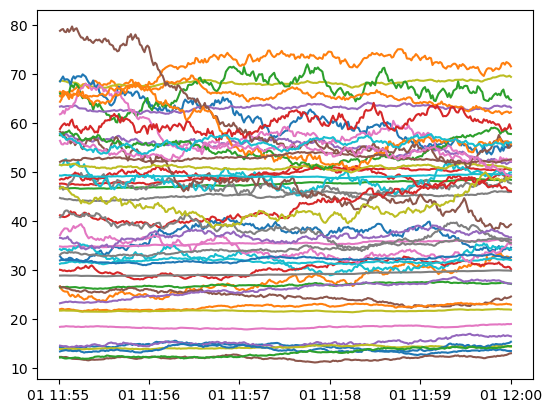

In [150]:
for col in train.columns:
    plt.plot(train[col])

In [139]:
for i in range(50):
    series = train[str(i)]
    res = sm.tsa.stattools.adfuller(series)
    if res[1] < 0.05:
        print(i, res)

7 (-3.06418724594344, 0.029319534820018967, 0, 299, {'1%': -3.4524113009049935, '5%': -2.8712554127251764, '10%': -2.571946570731871}, 245.60316139758368)
8 (-3.116629052118229, 0.02534679020418392, 1, 298, {'1%': -3.4524859843440754, '5%': -2.871288184343229, '10%': -2.571964047565425}, -540.1946187928909)
28 (-3.063574943240311, 0.02936889487317327, 3, 296, {'1%': -3.452636878592149, '5%': -2.8713543954331433, '10%': -2.5719993576515705}, -483.1160804627716)
43 (-2.9975632396953333, 0.0351225905137566, 0, 299, {'1%': -3.4524113009049935, '5%': -2.8712554127251764, '10%': -2.571946570731871}, 465.81737986652934)
46 (-3.2744947964003273, 0.016057770430221018, 0, 299, {'1%': -3.4524113009049935, '5%': -2.8712554127251764, '10%': -2.571946570731871}, 201.40389453438797)
49 (-3.6505066797928616, 0.004865704048235093, 7, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, 62.84159518160459)


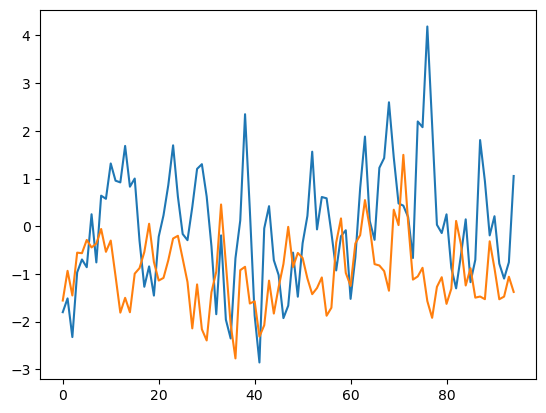

In [84]:
from lead_lag import lag


ts = sm.tsa.arima_process.arma_generate_sample([1, -0.75, 0.25], [1], 100)
shifted = ts[5:] * 0.6 - 1 + np.random.randn(100) * 0.1
ts = ts[:-5]
plt.plot(ts)
plt.plot(shifted)



In [85]:
from datetime import datetime, timedelta

t = pd.Series(data=ts, index=[datetime(2022, 1, 1, 12, 0, 0) - timedelta(seconds=i) for i in range(len(ts))])
s = pd.Series(data=shifted, index=[datetime(2022, 1, 1, 12, 0, 0) - timedelta(seconds=i) for i in range(len(shifted))])

lag(t, s, max_lag=10)

5.0

In [86]:
import lead_lag

ll = lead_lag.LeadLag(
    ts1 = t,
    ts2 = s,
    max_lag = 20,
    verbose=True,
    min_precision=0.1
)
ll.run_inference()

Precision = 100.0 ms.
Running slow_inference() on (-200:200) with 1 thread.
Lag=-200, contrast=0.16061, elapsed=0.00ms.
Lag=-199, contrast=0.34914, elapsed=0.00ms.
Lag=-198, contrast=0.34914, elapsed=0.00ms.
Lag=-197, contrast=0.34914, elapsed=0.00ms.
Lag=-196, contrast=0.34914, elapsed=1.00ms.
Lag=-195, contrast=0.34914, elapsed=0.00ms.
Lag=-194, contrast=0.34914, elapsed=0.00ms.
Lag=-193, contrast=0.34914, elapsed=0.00ms.
Lag=-192, contrast=0.34914, elapsed=0.00ms.
Lag=-191, contrast=0.34914, elapsed=0.00ms.
Lag=-190, contrast=0.18853, elapsed=0.00ms.
Lag=-189, contrast=0.05747, elapsed=0.00ms.
Lag=-188, contrast=0.05747, elapsed=1.00ms.
Lag=-187, contrast=0.05747, elapsed=0.00ms.
Lag=-186, contrast=0.05747, elapsed=0.00ms.
Lag=-185, contrast=0.05747, elapsed=0.00ms.
Lag=-184, contrast=0.05747, elapsed=0.00ms.
Lag=-183, contrast=0.05747, elapsed=0.00ms.
Lag=-182, contrast=0.05747, elapsed=0.00ms.
Lag=-181, contrast=0.05747, elapsed=0.00ms.
Lag=-180, contrast=0.13107, elapsed=1.00ms.


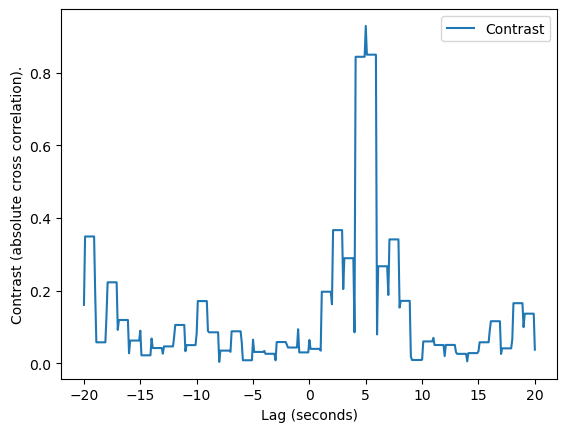

In [87]:
ll.plot_results()

In [90]:
train.index = index=[datetime(2022, 1, 1, 12, 0, 0) - timedelta(seconds=i) for i in range(train.shape[0])]

In [169]:
import lead_lag as ll


results = {}
for i in range(50):
    for j in range(i+1, 50):
        t1, t2 = str(i), str(j)
        lag = ll.lag(train[t1], train[t2], max_lag=50)
        lag = int(lag)
        # test for cointegration
        if lag > 0:
            # t1 leads t2, shift t1 forward

            pass
        elif lag < 0:
            # other way
            t1, t2 = t2, t1
            lag = -lag
        else:
            continue

        shiftt1 = train[t1].shift(lag)[lag:]
        shiftt2 = train[t2][:-lag]
        res = sm.tsa.stattools.coint(shiftt1, shiftt2)
        results[t1,t2] = (res[1], lag)


In [ ]:

for pair, (value, lag) in results.items():
    if value < 0.05:
        print(pair, lag)

In [203]:
from arbitragelab.cointegration_approach.minimum_profit import MinimumProfit


c:\Users\forti\miniconda3\envs\scientific310\lib\site-packages\ot\backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [ ]:
def analyze(t1, t2, lag):
    # t1 always leads

    shiftt1 = train[t1].shift(lag)[lag:]
    shiftt1_df = df[t1].shift(lag)[lag:]
    shiftt2 = train[t2][:-lag]
    shiftt2_df = df[t2][:-lag]

    res = sm.tsa.stattools.coint(shiftt1, shiftt2)

    # analyze shift
    opt = MinimumProfit()
    opt.set_train_dataset(pd.DataFrame(
        data={t1: shiftt1.values.copy(), t2: shiftt2.values.copy()},
        index=pd.to_datetime(range(shiftt1.shape[0]))
    ))

    beta_eg, epsilon_t_eg, ar_coeff_eg, ar_resid_eg = opt.fit( sig_level="90%")
    delta = shiftt1 + beta_eg * shiftt2
    me = np.mean(delta)
    # m, b = np.polyfit(shiftt1, shiftt2, 1)
    delta = shiftt1_df + beta_eg * shiftt2_df
    plt.figure()
    plt.title(f"{t1} {t2} {lag} {res[1]} {beta_eg}")
    plt.plot(delta - me)
    plt.savefig(f'{t1}and{t2}.png')


for pair, (value, lag) in results.items():
    if value < 0.05:
        analyze(pair[0], pair[1], lag)

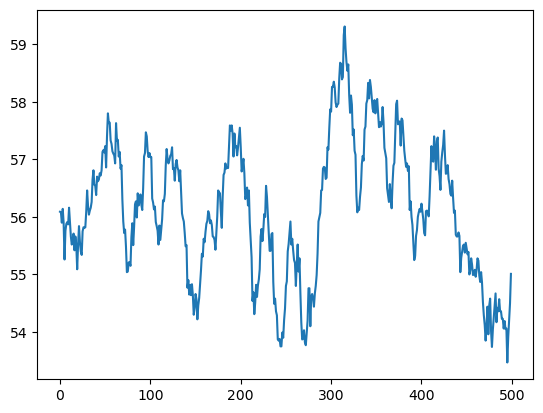

In [246]:
plt.plot(df['49'])
# plt.plot(df['2'])